In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
#загружаем параметры
df=pd.read_excel("ach.xlsx")
df

Heff  Perm   Sg  L_hor      GS      temp   C5  GRP  cond rate  \
0        5   0.1  0.4   1200  S-TYPE  1.023962  300   12   7.008923   
1        5   0.1  0.4   1200  S-TYPE  1.023962  300   12   7.008923   
2        5   0.1  0.7   1200  S-TYPE  0.682594  400   12  12.817532   
3        5   1.0  0.7   1200  S-TYPE  2.874361  400   12  41.972438   
4        5   2.0  0.7   1200  S-TYPE  4.058998  400   12  54.789397   
...    ...   ...  ...    ...     ...       ...  ...  ...        ...   
6799    15   1.0  0.7      0      GS  0.423870  400    1  24.920970   
6800    15   2.0  0.7      0      GS  0.647879  400    1  37.745589   
6801    30   0.1  0.7      0      GS  0.073152  400    1   8.596542   
6802    30   1.0  0.7      0      GS  0.342655  400    1  39.667425   
6803    30   2.0  0.7      0      GS  0.513796  400    1  59.202137   

        gas rate         NPV   sum cond    sum gas  nGS  
0      24.556392 -518.796275   12.55730   60.88822    1  
1      24.556392 -518.796275   12.55730   60.88822    1  
2      29.035123 -487.985227   30.53996   97.43588    1  
3     122.265151 -378.712873   51.73634  188.76430    1  
4     172.655425 -335.957999   62.83736  233.86180    1  
...          ...         ...        ...        ...  ...  
6799   53.551342 -201.776420  108.60540  337.08570    0  
6800   81.852438 -106.233906  167.42070  531.36250    0  
6801   17.820058 -313.637699   53.38205  134.82330    0  
6802   83.472411  -76.861128  206.59930  600.60730    0  
6803  125.163178   80.006937  321.07470  939.42300    0  

[6804 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Heff       6804 non-null   int64  
 1   Perm       6804 non-null   float64
 2   Sg         6804 non-null   float64
 3   L_hor      6804 non-null   int64  
 4   GS         6804 non-null   object 
 5   temp       6804 non-null   float64
 6   C5         6804 non-null   int64  
 7   GRP        6804 non-null   int64  
 8   cond rate  6804 non-null   float64
 9   gas rate   6804 non-null   float64
 10  NPV        6804 non-null   float64
 11  sum cond   6804 non-null   float64
 12  sum gas    6804 non-null   float64
 13  nGS        6804 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 744.3+ KB


In [6]:
df.describe().transpose()

count         mean         std         min          25%  \
Heff       6804.0    16.666667   10.274778    5.000000     5.000000   
Perm       6804.0     1.033333    0.776087    0.100000     0.100000   
Sg         6804.0     0.550000    0.150011    0.400000     0.400000   
L_hor      6804.0  1298.412698  488.795954    0.000000  1000.000000   
temp       6804.0     1.821029    1.296676    0.073152     0.682097   
C5         6804.0   350.000000   50.003675  300.000000   300.000000   
GRP        6804.0     9.793651    5.002458    1.000000     6.000000   
cond rate  6804.0    56.520785   51.484610    1.112635    17.818899   
gas rate   6804.0   165.252545  142.164983    3.159162    48.055712   
NPV        6804.0  -202.393870  309.876559 -786.548574  -398.805472   
sum cond   6804.0   119.109663  107.826121    4.788555    38.493395   
sum gas    6804.0   499.986437  429.570025   17.534730   171.355425   
nGS        6804.0     0.984127    0.124993    0.000000     1.000000   

                   50%          75%          max  
Heff         15.000000    30.000000    30.000000  
Perm          1.000000     2.000000     2.000000  
Sg            0.550000     0.700000     0.700000  
L_hor      1200.000000  1500.000000  2000.000000  
temp          1.835660     2.386769     7.562910  
C5          350.000000   400.000000   400.000000  
GRP          10.000000    12.000000    20.000000  
cond rate    36.708753    81.345911   310.075616  
gas rate    114.693562   251.276171   752.398082  
NPV        -304.936269   -23.133324   876.687031  
sum cond     81.179420   171.753700   547.448400  
sum gas     311.453100   719.788650  1856.309000  
nGS           1.000000     1.000000     1.000000

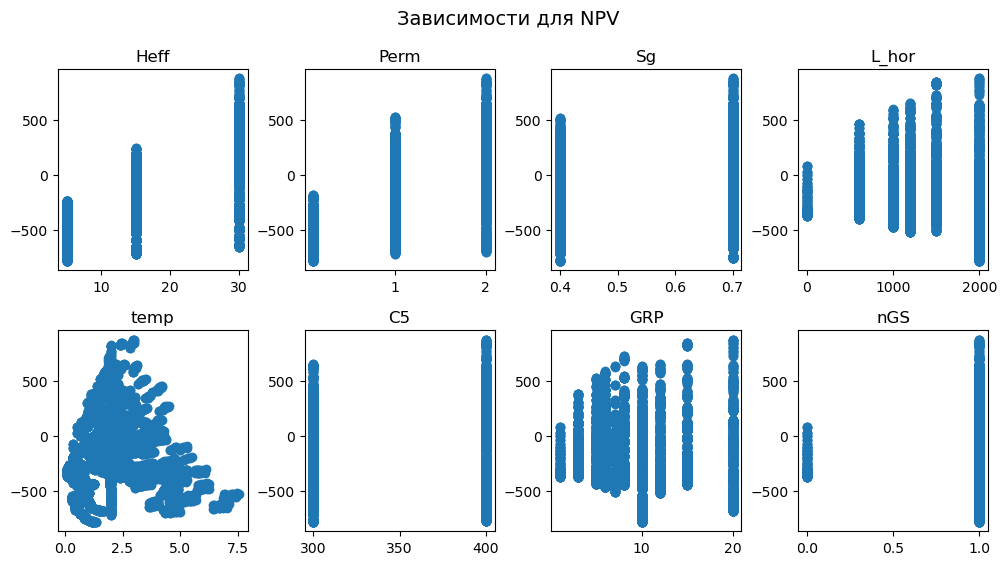

In [7]:
#визуализация
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(12,6))
# УСТАНАВЛИВАЕМ ПАРАМЕТРЫ AXES
# Параметры на уровне объекта axes 
axes[0][0].scatter(df['Heff'],df['NPV'])
axes[0][0].set_title('Heff')

axes[0][1].scatter(df['Perm'],df['NPV'])
axes[0][1].set_title('Perm')

axes[0][2].scatter(df['Sg'],df['NPV'])
axes[0][2].set_title('Sg')

axes[0][3].scatter(df['L_hor'],df['NPV'])
axes[0][3].set_title('L_hor')

axes[1][0].scatter(df['temp'],df['NPV'])
axes[1][0].set_title('temp')

axes[1][1].scatter(df['C5'],df['NPV'])
axes[1][1].set_title('C5')

axes[1][2].scatter(df['GRP'],df['NPV'])
axes[1][2].set_title('GRP')

axes[1][3].scatter(df['nGS'],df['NPV'])
axes[1][3].set_title('nGS')
# ДАЛЕЕ УСТАНАВЛИВАЕМ ОБЩИЕ ПАРАМЕТРЫ FIGURE

# Параметры на уровне объекта Figure
fig.suptitle("Зависимости для NPV",fontsize=14)
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.3)

In [8]:
#анализ данных
X=df.drop(['cond rate','gas rate','sum cond','sum gas','NPV'],axis=1)
y=df['NPV']
X=pd.get_dummies(X,drop_first=True)
df_new=pd.concat([X,y],axis=1)
df_new.corr()['NPV']

Heff         0.620018
Perm         0.546319
Sg           0.186971
L_hor       -0.124844
temp         0.140619
C5           0.085344
GRP         -0.030109
nGS          0.015284
GS_NGS      -0.009220
GS_S-TYPE   -0.006732
GS_U-TYPE   -0.019783
GS_VGS      -0.009453
NPV          1.000000
Name: NPV, dtype: float64

<Axes: >

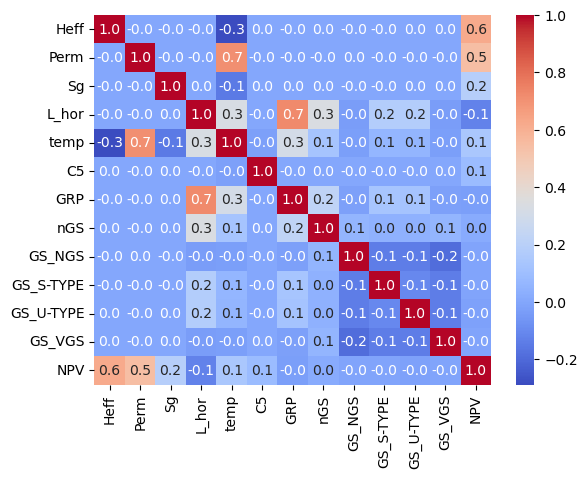

In [9]:
sns.heatmap(df_new.corr(),annot=True,fmt='.1f', cmap='coolwarm')

In [10]:
# Выделение обучающей и тестовой выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
# Сводная таблица сравнения метрик моделей
result_metric=pd.DataFrame(index=['MAE','MSE','RMSE','MedAE','R^2','R','MAPE'])

In [45]:
# Сводная таблица гиперпараметров моделей
result_param=pd.DataFrame()

In [46]:
# Сводная таблица важности признаков моделей
result_importance=pd.DataFrame(index=X.columns)

In [47]:
# Функция обучения, предсказания и расчета метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,median_absolute_error,mean_squared_log_error
def run_model(model,X_train,X_test,y_train,y_test):  
# Обучение
    n_epochs = 10
    for epoch in tqdm(range(n_epochs), desc='Epochs'):
        model.fit(X_train,y_train)
# Предсказание  
    y_pred=np.empty(0)
    y_pred = model.predict(X_test)
# Расчет метрик    
    MAE=np.round(mean_absolute_error(y_test,y_pred),2)
    MSE=np.round(mean_squared_error(y_test,y_pred),2)
    RMSE=np.round(np.sqrt(MSE),2)
    MedAE=np.round(median_absolute_error(y_test,y_pred),2)
    SqR=np.round(r2_score(y_test,y_pred),2)
    R=np.round(np.sqrt(SqR),2)
    MAPE=np.round((abs((y_test-y_pred)/y_test)).mean(),2)
    result_metric[str(model)]=[MAE,MSE,RMSE,MedAE,SqR,R,MAPE]

In [48]:
# Масштабирование признаков для линейной регресии
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
scaler_stand=MinMaxScaler()
# Расчет параметров по обучающей выборке для масштабирования (среднее, стандартное отклонение)/масштабирование
X_train_scale=scaler.fit_transform(X_train)
# Масштабирование тестовой выборки
X_test_scale=scaler.transform(X_test)

In [67]:
# 1. Линейная регрессия
# Создание модели
from sklearn.linear_model import LassoLarsCV
model_line=LassoLarsCV(eps=0.1,max_n_alphas=np.sqrt(len(X_train_scale)),max_iter=10000)
# Обучение, предсказание и метрики
run_model(model_line,X_train_scale,X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(model_line)}':'LassoLarsCV'},inplace=True)
# Гиперпараметры
alph=model_line.alpha_
result_param.loc['alphas','LassoLarsCV_line']=alph
# Важность признаков
result_importance['LassoLarsCV_line']=np.round(abs(model_line.coef_)/sum(abs(model_line.coef_)),2)

Epochs: 100%|██████████| 10/10 [00:00<00:00, 21.91it/s]


In [70]:
result_metric

LassoLarsCV  \
MAE         122.56   
MSE       24152.83   
RMSE        155.41   
MedAE       101.24   
R^2           0.76   
R             0.87   
MAPE          2.28   

       GridSearchCV(estimator=RidgeCV(),\n             param_grid={'alphas': [0.1, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0]})  \
MAE                                                45.24                                                                   
MSE                                              3059.78                                                                   
RMSE                                               55.32                                                                   
MedAE                                              39.12                                                                   
R^2                                                 0.97                                                                   
R                                                   0.98                                                                   
MAPE                                                0.40                                                                   

       LassoCV(eps=0.1, n_alphas=1000)  \
MAE                              82.82   
MSE                           13473.98   
RMSE                            116.08   
MedAE                            56.77   
R^2                               0.87   
R                                 0.93   
MAPE                              2.46   

       ElasticNetCV(eps=0.1, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],\n             n_alphas=1000)  
MAE                                                82.82                                                 
MSE                                             13473.98                                                 
RMSE                                              116.08                                                 
MedAE                                              56.77                                                 
R^2                                                 0.87                                                 
R                                                   0.93                                                 
MAPE                                                2.46

In [71]:
# Полиномиальная регрессия
# Создание новых признаков (полином)
from sklearn.preprocessing import PolynomialFeatures
poly_convertor=PolynomialFeatures(degree=2)
poly_X=poly_convertor.fit_transform(X)
# Выделение обучающей и тестовой выборки
poly_X_train, poly_X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.1, random_state=42)
# Расчет параметров по обучающей выборке для масштабирования (среднее, стандартное отклонение)/масштабирование
poly_X_train_scale=scaler.fit_transform(poly_X_train)
# Масштабирование тестовой выборки
poly_X_test_scale=scaler.transform(poly_X_test)

In [72]:
# 2. Полиномиальная регрессия с RidgeCV
# Создаем модель
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
model_line_poly_R=RidgeCV()
param_grid={'alphas':[0.1,0.5,1.0,2.0,4.0,6.0,8.0,10.0]}
grid_model_line_poly_R=GridSearchCV(estimator=model_line_poly_R,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_line_poly_R,poly_X_train_scale,poly_X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_line_poly_R)}':'RidgeCV_polynom'},inplace=True)
# Гиперпараметры
alph_poly_R=grid_model_line_poly_R.best_params_.get('alphas')
result_param.loc['alphas','RidgeCV_polynom']=alph_poly_R

Epochs: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


In [76]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV(eps=0.1, n_alphas=1000)  \
MAE         122.56            45.24                            82.82   
MSE       24152.83          3059.78                         13473.98   
RMSE        155.41            55.32                           116.08   
MedAE       101.24            39.12                            56.77   
R^2           0.76             0.97                             0.87   
R             0.87             0.98                             0.93   
MAPE          2.28             0.40                             2.46   

       ElasticNetCV(eps=0.1, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],\n             n_alphas=1000)  
MAE                                                82.82                                                 
MSE                                             13473.98                                                 
RMSE                                              116.08                                                 
MedAE                                              56.77                                                 
R^2                                                 0.87                                                 
R                                                   0.93                                                 
MAPE                                                2.46

In [77]:
# 3. Полиномиальная регрессия с LassoCV
# Создаем модель
from sklearn.linear_model import LassoCV
model_line_poly_L=LassoCV(eps=0.1,n_alphas=1000)
# Обучение, предсказание и метрики
run_model(model_line_poly_L,poly_X_train_scale,poly_X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(model_line_poly_L)}':'LassoCV_polynom'},inplace=True)
# Гиперпараметры
alph_poly_L=model_line_poly_L.alpha_
result_param.loc['alphas','LassoCV_polynom']=np.round(alph_poly_L,3)

Epochs: 100%|██████████| 10/10 [00:25<00:00,  2.60s/it]


In [78]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  \
MAE         122.56            45.24            82.82   
MSE       24152.83          3059.78         13473.98   
RMSE        155.41            55.32           116.08   
MedAE       101.24            39.12            56.77   
R^2           0.76             0.97             0.87   
R             0.87             0.98             0.93   
MAPE          2.28             0.40             2.46   

       ElasticNetCV(eps=0.1, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],\n             n_alphas=1000)  
MAE                                                82.82                                                 
MSE                                             13473.98                                                 
RMSE                                              116.08                                                 
MedAE                                              56.77                                                 
R^2                                                 0.87                                                 
R                                                   0.93                                                 
MAPE                                                2.46

In [79]:
# 4. Полиномиальная регрессия с ElasticNetCV
# Создание модели
from sklearn.linear_model import ElasticNetCV
model_line_poly_E=ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],eps=0.1,n_alphas=1000)
# Обучение, предсказание и метрики
run_model(model_line_poly_E,poly_X_train_scale,poly_X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(model_line_poly_E)}':'Elastic_polynom'},inplace=True)
# Гиперпараметры
alph_poly_E=model_line_poly_E.alpha_
l1_poly_E=model_line_poly_E.l1_ratio_
result_param.loc['alphas','Elastic_polynom']=np.round(alph_poly_E,3)
result_param.loc['l1_ratio','Elastic_polynom']=l1_poly_E

Epochs: 100%|██████████| 10/10 [02:53<00:00, 17.31s/it]


In [80]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom
MAE         122.56            45.24            82.82            82.82
MSE       24152.83          3059.78         13473.98         13473.98
RMSE        155.41            55.32           116.08           116.08
MedAE       101.24            39.12            56.77            56.77
R^2           0.76             0.97             0.87             0.87
R             0.87             0.98             0.93             0.93
MAPE          2.28             0.40             2.46             2.46

In [81]:
# 5.Дерево решений
# Создание модели
from sklearn.tree import DecisionTreeRegressor,plot_tree
model_onetree=DecisionTreeRegressor()
param_grid={'max_depth':[3,5,7,9,10,12],'criterion':['squared_error','friedman_mse','absolute_error']}
grid_model_onetree=GridSearchCV(estimator=model_onetree,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_onetree,X_train,X_test,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_onetree)}':'OneTree'},inplace=True)
# Гиперпараметры
depth_onetree=grid_model_onetree.best_params_.get('max_depth')
crit=grid_model_onetree.best_params_.get('criterion')
result_param.loc['max_depth','OneTree']=depth_onetree
result_param.loc['criterion','OneTree']=crit

Epochs: 100%|██████████| 10/10 [04:50<00:00, 29.10s/it]


In [82]:
# Важность признаков
result_importance['OneTree']=np.round(grid_model_onetree.best_estimator_.feature_importances_,2)
result_importance

LassoLarsCV_line  OneTree
Heff                   0.31     0.38
Perm                   0.29     0.41
Sg                     0.09     0.05
L_hor                  0.12     0.08
temp                   0.01     0.05
C5                     0.04     0.01
GRP                    0.07     0.02
nGS                    0.03     0.00
GS_NGS                 0.01     0.00
GS_S-TYPE              0.00     0.00
GS_U-TYPE              0.00     0.00
GS_VGS                 0.01     0.00

In [83]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  OneTree
MAE         122.56            45.24            82.82            82.82     3.75
MSE       24152.83          3059.78         13473.98         13473.98    80.05
RMSE        155.41            55.32           116.08           116.08     8.95
MedAE       101.24            39.12            56.77            56.77     0.84
R^2           0.76             0.97             0.87             0.87     1.00
R             0.87             0.98             0.93             0.93     1.00
MAPE          2.28             0.40             2.46             2.46     0.07

In [84]:
# 6.Случайный лес
# Создание модели
from sklearn.ensemble import RandomForestRegressor
model_randomtree=RandomForestRegressor()
param_grid={'n_estimators':[50,70,100],'max_depth':[5,7,10],
            'criterion':['squared_error','friedman_mse']}
grid_model_randomtree=GridSearchCV(estimator=model_randomtree,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_randomtree,X_train,X_test,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_randomtree)}':'RandomTree'},inplace=True)
# Гиперпараметры
depth_randomtree=grid_model_randomtree.best_params_.get('max_depth')
crit_randomtree=grid_model_randomtree.best_params_.get('criterion')
estimator=grid_model_randomtree.best_params_.get('n_estimators')
result_param.loc['max_depth','RandomTree']=depth_randomtree
result_param.loc['criterion','RandomTree']=crit_randomtree
result_param.loc['n_estimator','RandomTree']=estimator

Epochs: 100%|██████████| 10/10 [12:41<00:00, 76.10s/it]


In [85]:
# Важность признаков
result_importance['RandomTree']=np.round(grid_model_randomtree.best_estimator_.feature_importances_,2)
result_importance

LassoLarsCV_line  OneTree  RandomTree
Heff                   0.31     0.38        0.39
Perm                   0.29     0.41        0.41
Sg                     0.09     0.05        0.05
L_hor                  0.12     0.08        0.08
temp                   0.01     0.05        0.03
C5                     0.04     0.01        0.01
GRP                    0.07     0.02        0.02
nGS                    0.03     0.00        0.00
GS_NGS                 0.01     0.00        0.00
GS_S-TYPE              0.00     0.00        0.00
GS_U-TYPE              0.00     0.00        0.00
GS_VGS                 0.01     0.00        0.00

In [86]:
 result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  
MAE       3.75        6.81  
MSE      80.05      126.68  
RMSE      8.95       11.26  
MedAE     0.84        3.87  
R^2       1.00        1.00  
R         1.00        1.00  
MAPE      0.07        0.25

In [89]:
# Градиентный бустинг
# 7. XGBoost (Chen)- Extreme Gradient Boosting
# Отличия:
#1.включена регуляризация L1,L2 - убираем шумы,когда мы ложно делим на листы
#2.заранее задаем глубину, потом отсекаем листы по информативности INF GAIN
# Разбиение по параметру (INF GAIN) Similarity score=сумма квадратов остатков/(N+lambda)
# Создание модели
import xgboost as xgb
model_xgb=xgb.XGBRegressor()
param_grid={'n_estimators':[50,70,100],'max_depth':[3,5,10],'learning_rate':[0.01,0.1,0.2,0.3]}
grid_model_xgb=GridSearchCV(estimator=model_xgb,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_xgb,X_train,X_test,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_xgb)}':'XGBoost'},inplace=True)

Epochs: 100%|██████████| 10/10 [06:15<00:00, 37.50s/it]


In [90]:
# Гиперпараметры
depth_xgb=grid_model_xgb.best_params_.get('max_depth')
learn_rate_xgb=grid_model_xgb.best_params_.get('learning_rate')
estimator_xgb=grid_model_xgb.best_params_.get('n_estimators')
result_param.loc['max_depth','XGBoost']=depth_xgb
result_param.loc['learn_rate','XGBoost']=learn_rate_xgb
result_param.loc['n_estimator','XGBoost']=estimator_xgb

In [91]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  XGBoost  
MAE       3.75        6.81     3.98  
MSE      80.05      126.68    32.61  
RMSE      8.95       11.26     5.71  
MedAE     0.84        3.87     2.67  
R^2       1.00        1.00     1.00  
R         1.00        1.00     1.00  
MAPE      0.07        0.25     0.04

In [107]:
result_param

LassoLarsCV_line  RidgeCV_polynom  LassoCV_polynom  \
alphas               0.001817              0.1           27.157   
l1_ratio                  NaN              NaN              NaN   
max_depth                 NaN              NaN              NaN   
criterion                 NaN              NaN              NaN   
n_estimator               NaN              NaN              NaN   
learn_rate                NaN              NaN              NaN   

             Elastic_polynom       OneTree     RandomTree  XGBoost  
alphas                27.157           NaN            NaN      NaN  
l1_ratio               1.000           NaN            NaN      NaN  
max_depth                NaN          12.0           10.0      5.0  
criterion                NaN  friedman_mse  squared_error      NaN  
n_estimator              NaN           NaN             70    100.0  
learn_rate               NaN           NaN            NaN      0.3

In [108]:
# Важность признаков
result_importance['XGBoost']=np.round(grid_model_xgb.best_estimator_.feature_importances_,2)
result_importance

LassoLarsCV_line  OneTree  RandomTree  XGBoost
Heff                   0.31     0.38        0.39     0.30
Perm                   0.29     0.41        0.41     0.49
Sg                     0.09     0.05        0.05     0.08
L_hor                  0.12     0.08        0.08     0.06
temp                   0.01     0.05        0.03     0.03
C5                     0.04     0.01        0.01     0.02
GRP                    0.07     0.02        0.02     0.01
nGS                    0.03     0.00        0.00     0.00
GS_NGS                 0.01     0.00        0.00     0.00
GS_S-TYPE              0.00     0.00        0.00     0.00
GS_U-TYPE              0.00     0.00        0.00     0.00
GS_VGS                 0.01     0.00        0.00     0.00

In [109]:
# Градиентный бустинг
# 8. LightGBM (Microsoft) - основана на GOSS - Gradient Based One Side Sampling
# Отличия:
#1.уменьшение скорости расчета за счет обучения на всей выборке с большой ошибкой (A) + небольшой выборке с маленькой ошибкой (B)
#2.минус - нарушение распределения наблюдений, компенсируем коэффициентом k=(1-A)/B
# Разбиение по параметру INF GAIN=вес листа*(сумма остатков по А + сумма остатков по В*k)**2
#встроенная кодировка категориальных признаков
# Exclusive feature bulding (EFB) - замена коррелиющих признаков на один
# Создание модели
import lightgbm as lgb
model_lgb=lgb.LGBMRegressor()
param_grid={'num_leaves': [20,50],'n_estimators':[50,100],'max_depth':[-1,3,10],'learning_rate':[0.01,0.1,0.3]}
grid_model_lgb=GridSearchCV(estimator=model_lgb,param_grid=param_grid,verbose=0)
# Обучение, предсказание и метрики
run_model(grid_model_lgb,X_train,X_test,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_lgb)}':'LightGBM'},inplace=True)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start training from score -204.304654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start training from score -203.721242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start tra

Epochs:  10%|█         | 1/10 [00:10<01:37, 10.88s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 6123, number of used features: 12
[LightGBM] [Info] Start training from 

Epochs:  20%|██        | 2/10 [00:20<01:23, 10.41s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 secon

Epochs:  30%|███       | 3/10 [00:30<01:11, 10.22s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start training from score -204.304654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start training from score -203.721242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start tra

Epochs:  30%|███       | 3/10 [00:31<01:14, 10.61s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4899, number of used features: 12
[LightGBM] [Info] Start training from score -205.400799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 12
[LightGBM] [Info] Start training from score -204.304654


KeyboardInterrupt: 

In [113]:
# Гиперпараметры
depth_lgb=grid_model_lgb.best_params_.get('max_depth')
learn_rate_lgb=grid_model_lgb.best_params_.get('learning_rate')
estimator_lgb=grid_model_lgb.best_params_.get('n_estimators')
num_leaves_lgb=grid_model_lgb.best_params_.get('num_leave')
result_param.loc['max_depth','LightGBM']=depth_lgb
result_param.loc['learn_rate','LightGBM']=learn_rate_lgb
result_param.loc['n_estimator','LightGBM']=estimator_lgb
result_param.loc['n_estimator','LightGBM']=num_leaves_lgb
result_param

LassoLarsCV_line  RidgeCV_polynom  LassoCV_polynom  \
alphas               0.001817              0.1           27.157   
l1_ratio                  NaN              NaN              NaN   
max_depth                 NaN              NaN              NaN   
criterion                 NaN              NaN              NaN   
n_estimator               NaN              NaN              NaN   
learn_rate                NaN              NaN              NaN   

             Elastic_polynom       OneTree     RandomTree  XGBoost  LightGBM  
alphas                27.157           NaN            NaN      NaN       NaN  
l1_ratio               1.000           NaN            NaN      NaN       NaN  
max_depth                NaN          12.0           10.0      5.0      -1.0  
criterion                NaN  friedman_mse  squared_error      NaN       NaN  
n_estimator              NaN           NaN             70    100.0       NaN  
learn_rate               NaN           NaN            NaN      0.3       0.3

In [110]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  XGBoost  LightGBM  
MAE       3.75        6.81     3.98      3.06  
MSE      80.05      126.68    32.61     22.17  
RMSE      8.95       11.26     5.71      4.71  
MedAE     0.84        3.87     2.67      2.00  
R^2       1.00        1.00     1.00      1.00  
R         1.00        1.00     1.00      1.00  
MAPE      0.07        0.25     0.04      0.09

In [123]:
# Важность признаков
result_importance['LightGBM']=np.round(grid_model_lgb.best_estimator_.feature_importances_/grid_model_lgb.best_estimator_.feature_importances_.sum(),2)
result_importance

LassoLarsCV_line  OneTree  RandomTree  XGBoost  LightGBM
Heff                   0.31     0.38        0.39     0.30      0.08
Perm                   0.29     0.41        0.41     0.49      0.05
Sg                     0.09     0.05        0.05     0.08      0.05
L_hor                  0.12     0.08        0.08     0.06      0.13
temp                   0.01     0.05        0.03     0.03      0.44
C5                     0.04     0.01        0.01     0.02      0.07
GRP                    0.07     0.02        0.02     0.01      0.12
nGS                    0.03     0.00        0.00     0.00      0.00
GS_NGS                 0.01     0.00        0.00     0.00      0.02
GS_S-TYPE              0.00     0.00        0.00     0.00      0.01
GS_U-TYPE              0.00     0.00        0.00     0.00      0.02
GS_VGS                 0.01     0.00        0.00     0.00      0.02

In [ ]:
# Градиентный бустинг
# 9. CatBoost (Yandex) - основан на Orded Boosting
# Отличия:
#1.обучение и прогноз на разных выборках (bootstrap)
#2.минус - 
# Создание модели
import catboost as cgb
model_cgb=cgb.CatBoostRegressor()
param_grid={'l2_leaf_reg': [3, 5],'iterations':[100,200,300],'depth':[3,5,10],'learning_rate':[0.1,0.2,0.3]}
grid_model_cgb=GridSearchCV(estimator=model_cgb,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_cgb,X_train,X_test,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_cgb)}':'CatBoost'},inplace=True)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

0:	learn: 288.2011616	total: 1.11ms	remaining: 110ms
1:	learn: 268.7328615	total: 2.26ms	remaining: 111ms
2:	learn: 250.2049381	total: 3.74ms	remaining: 121ms
3:	learn: 234.8115135	total: 4.9ms	remaining: 118ms
4:	learn: 220.2054673	total: 6.01ms	remaining: 114ms
5:	learn: 207.6128566	total: 7.01ms	remaining: 110ms
6:	learn: 196.7920808	total: 8.01ms	remaining: 106ms
7:	learn: 186.3538003	total: 9.08ms	remaining: 104ms
8:	learn: 176.0138462	total: 10.2ms	remaining: 103ms
9:	learn: 167.8114664	total: 11.2ms	remaining: 101ms
10:	learn: 159.2246026	total: 12.3ms	remaining: 99.5ms
11:	learn: 151.6922840	total: 13.4ms	remaining: 98.5ms
12:	learn: 144.5354448	total: 14.5ms	remaining: 96.9ms
13:	learn: 138.1719084	total: 15.5ms	remaining: 95.3ms
14:	learn: 132.5192113	total: 16.5ms	remaining: 93.3ms
15:	learn: 127.0387915	total: 17.5ms	remaining: 91.7ms
16:	learn: 122.2465563	total: 18.6ms	remaining: 90.7ms
17:	learn: 117.6470301	total: 19.5ms	remaining: 89ms
18:	learn: 113.3140112	total: 20.

Epochs:  10%|█         | 1/10 [04:39<41:57, 279.74s/it]

299:	learn: 2.3393481	total: 5.3s	remaining: 0us
0:	learn: 288.2011616	total: 1.7ms	remaining: 168ms
1:	learn: 268.7328615	total: 2.97ms	remaining: 146ms
2:	learn: 250.2049381	total: 4.99ms	remaining: 161ms
3:	learn: 234.8115135	total: 6.56ms	remaining: 157ms
4:	learn: 220.2054673	total: 8.31ms	remaining: 158ms
5:	learn: 207.6128566	total: 9.51ms	remaining: 149ms
6:	learn: 196.7920808	total: 10.6ms	remaining: 141ms
7:	learn: 186.3538003	total: 11.7ms	remaining: 134ms
8:	learn: 176.0138462	total: 12.8ms	remaining: 130ms
9:	learn: 167.8114664	total: 13.9ms	remaining: 125ms
10:	learn: 159.2246026	total: 15ms	remaining: 121ms
11:	learn: 151.6922840	total: 16ms	remaining: 118ms
12:	learn: 144.5354448	total: 17.4ms	remaining: 117ms
13:	learn: 138.1719084	total: 18.5ms	remaining: 114ms
14:	learn: 132.5192113	total: 20.2ms	remaining: 114ms
15:	learn: 127.0387915	total: 21.8ms	remaining: 115ms
16:	learn: 122.2465563	total: 22.9ms	remaining: 112ms
17:	learn: 117.6470301	total: 24ms	remaining: 10

In [131]:
# Гиперпараметры
depth_cgb=grid_model_cgb.best_params_.get('depth')
learn_rate_cgb=grid_model_cgb.best_params_.get('learning_rate')
iter_cgb=grid_model_cgb.best_params_.get('iterations')
reg_cgb=grid_model_cgb.best_params_.get('l2_leaf_reg')
result_param.loc['max_depth','CatBoost']=depth_cgb
result_param.loc['learn_rate','CatBoost']=learn_rate_cgb
result_param.loc['iter','CatBoost']=iter_cgb
result_param.loc['l2_leaf','CatBoost']=reg_cgb

In [137]:
result_importance['CatBoost']=np.round(grid_model_cgb.best_estimator_.feature_importances_/grid_model_cgb.best_estimator_.feature_importances_.sum(),2)
result_importance

LassoLarsCV_line  OneTree  RandomTree  XGBoost  LightGBM  CatBoost
Heff                   0.31     0.38        0.39     0.30      0.08      0.38
Perm                   0.29     0.41        0.41     0.49      0.05      0.37
Sg                     0.09     0.05        0.05     0.08      0.05      0.08
L_hor                  0.12     0.08        0.08     0.06      0.13      0.10
temp                   0.01     0.05        0.03     0.03      0.44      0.01
C5                     0.04     0.01        0.01     0.02      0.07      0.02
GRP                    0.07     0.02        0.02     0.01      0.12      0.03
nGS                    0.03     0.00        0.00     0.00      0.00      0.00
GS_NGS                 0.01     0.00        0.00     0.00      0.02      0.00
GS_S-TYPE              0.00     0.00        0.00     0.00      0.01      0.00
GS_U-TYPE              0.00     0.00        0.00     0.00      0.02      0.00
GS_VGS                 0.01     0.00        0.00     0.00      0.02      0.00

In [138]:
result_param

LassoLarsCV_line  RidgeCV_polynom  LassoCV_polynom  \
alphas               0.001817              0.1           27.157   
l1_ratio                  NaN              NaN              NaN   
max_depth                 NaN              NaN              NaN   
criterion                 NaN              NaN              NaN   
n_estimator               NaN              NaN              NaN   
learn_rate                NaN              NaN              NaN   
iter                      NaN              NaN              NaN   
l2_leaf                   NaN              NaN              NaN   

             Elastic_polynom       OneTree     RandomTree  XGBoost  LightGBM  \
alphas                27.157           NaN            NaN      NaN       NaN   
l1_ratio               1.000           NaN            NaN      NaN       NaN   
max_depth                NaN          12.0           10.0      5.0      -1.0   
criterion                NaN  friedman_mse  squared_error      NaN       NaN   
n_estimator              NaN           NaN             70    100.0       NaN   
learn_rate               NaN           NaN            NaN      0.3       0.3   
iter                     NaN           NaN            NaN      NaN       NaN   
l2_leaf                  NaN           NaN            NaN      NaN       NaN   

             CatBoost  
alphas            5.0  
l1_ratio          NaN  
max_depth        10.0  
criterion         NaN  
n_estimator     300.0  
learn_rate        0.2  
iter            300.0  
l2_leaf           5.0

In [129]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  XGBoost  LightGBM  CatBoost  
MAE       3.75        6.81     3.98      3.06      2.21  
MSE      80.05      126.68    32.61     22.17     12.69  
RMSE      8.95       11.26     5.71      4.71      3.56  
MedAE     0.84        3.87     2.67      2.00      1.21  
R^2       1.00        1.00     1.00      1.00      1.00  
R         1.00        1.00     1.00      1.00      1.00  
MAPE      0.07        0.25     0.04      0.09      0.03

In [145]:
# Метод опорных векторов
# 10. SVM - Support Vector Mashine
# Создание модели
from sklearn.svm import SVR
model_svr=SVR()
param_grid={'C':[0.01,0.1,0.5,1],'epsilon':[0.01,0.1,0.5,1]}
grid_model_svr=GridSearchCV(estimator=model_svr,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_svr,X_train_scale,X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_svr)}':'SVM'},inplace=True)

Epochs: 100%|██████████| 10/10 [8:23:51<00:00, 3023.16s/it] 


In [148]:
# Гиперпараметры
C_penalty=grid_model_svr.best_params_.get('C')
eps=grid_model_svr.best_params_.get('epsilon')
result_param.loc['C','SVM']=C_penalty
result_param.loc['eps','SVM']=eps
result_param

LassoLarsCV_line  RidgeCV_polynom  LassoCV_polynom  \
alphas               0.001817              0.1           27.157   
l1_ratio                  NaN              NaN              NaN   
max_depth                 NaN              NaN              NaN   
criterion                 NaN              NaN              NaN   
n_estimator               NaN              NaN              NaN   
learn_rate                NaN              NaN              NaN   
iter                      NaN              NaN              NaN   
l2_leaf                   NaN              NaN              NaN   
C                         NaN              NaN              NaN   
eps                       NaN              NaN              NaN   

             Elastic_polynom       OneTree     RandomTree  XGBoost  LightGBM  \
alphas                27.157           NaN            NaN      NaN       NaN   
l1_ratio               1.000           NaN            NaN      NaN       NaN   
max_depth                NaN          12.0           10.0      5.0      -1.0   
criterion                NaN  friedman_mse  squared_error      NaN       NaN   
n_estimator              NaN           NaN             70    100.0       NaN   
learn_rate               NaN           NaN            NaN      0.3       0.3   
iter                     NaN           NaN            NaN      NaN       NaN   
l2_leaf                  NaN           NaN            NaN      NaN       NaN   
C                        NaN           NaN            NaN      NaN       NaN   
eps                      NaN           NaN            NaN      NaN       NaN   

             CatBoost  SVM  
alphas            5.0  NaN  
l1_ratio          NaN  NaN  
max_depth        10.0  NaN  
criterion         NaN  NaN  
n_estimator     300.0  NaN  
learn_rate        0.2  NaN  
iter            300.0  NaN  
l2_leaf           5.0  NaN  
C                 NaN  1.0  
eps               NaN  0.1

In [149]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  XGBoost  LightGBM  CatBoost       SVM  
MAE       3.75        6.81     3.98      3.06      2.21    149.51  
MSE      80.05      126.68    32.61     22.17     12.69  49703.95  
RMSE      8.95       11.26     5.71      4.71      3.56    222.94  
MedAE     0.84        3.87     2.67      2.00      1.21     82.22  
R^2       1.00        1.00     1.00      1.00      1.00      0.50  
R         1.00        1.00     1.00      1.00      1.00      0.71  
MAPE      0.07        0.25     0.04      0.09      0.03      3.69

In [151]:
# Neural Networks
from tensorflow import keras
# 11. Полносвязная нейронная сеть (Fully Connected Neural Network)
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
# Создание модели NN (архитектура)
def create_model(layers=1):
    model=keras.Sequential()
# Входной слой (равен количеству признаков)
    model.add(Dense(units=12,activation='linear'))
# Скрытые слои
    for _ in range(layers-1):
        model.add(Dense(units=12,activation='linear'))
# Выходной слой
    model.add(Dense(1,activation='linear'))
# Компиляция модели - задание метрики оценки качества и способа оптимизации алгоритма град спуска    
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])
    return model
model_FCNN=KerasRegressor(build_fn=create_model,verbose=0)
param_grid = {'layers': [1, 2, 3, 4, 5]}
grid_model_FCNN=GridSearchCV(estimator=model_FCNN,param_grid=param_grid)
# Обучение, предсказание и метрики
run_model(grid_model_FCNN,X_train_scale,X_test_scale,y_train,y_test)
result_metric.rename(columns={f'{str(grid_model_FCNN)}':'FCNN'},inplace=True)

Epochs: 100%|██████████| 10/10 [05:58<00:00, 35.89s/it]


In [152]:
result_metric

LassoLarsCV  RidgeCV_polynom  LassoCV_polynom  Elastic_polynom  \
MAE         122.56            45.24            82.82            82.82   
MSE       24152.83          3059.78         13473.98         13473.98   
RMSE        155.41            55.32           116.08           116.08   
MedAE       101.24            39.12            56.77            56.77   
R^2           0.76             0.97             0.87             0.87   
R             0.87             0.98             0.93             0.93   
MAPE          2.28             0.40             2.46             2.46   

       OneTree  RandomTree  XGBoost  LightGBM  CatBoost       SVM      FCNN  
MAE       3.75        6.81     3.98      3.06      2.21    149.51    125.69  
MSE      80.05      126.68    32.61     22.17     12.69  49703.95  26918.34  
RMSE      8.95       11.26     5.71      4.71      3.56    222.94    164.07  
MedAE     0.84        3.87     2.67      2.00      1.21     82.22     97.15  
R^2       1.00        1.00     1.00      1.00      1.00      0.50      0.73  
R         1.00        1.00     1.00      1.00      1.00      0.71      0.85  
MAPE      0.07        0.25     0.04      0.09      0.03      3.69      3.09

In [158]:
# Гиперпараметры
l=grid_model_FCNN.best_params_.get('layers')
result_param.loc['layers','FCNN']=l
result_param=result_param.fillna('-')
result_param

LassoLarsCV_line RidgeCV_polynom LassoCV_polynom Elastic_polynom  \
alphas              0.001817             0.1          27.157          27.157   
l1_ratio                   -               -               -             1.0   
max_depth                  -               -               -               -   
criterion                  -               -               -               -   
n_estimator                -               -               -               -   
learn_rate                 -               -               -               -   
iter                       -               -               -               -   
l2_leaf                    -               -               -               -   
C                          -               -               -               -   
eps                        -               -               -               -   
layers                     -               -               -               -   

                  OneTree     RandomTree XGBoost LightGBM CatBoost  SVM FCNN  
alphas                  -              -       -        -      5.0    -    -  
l1_ratio                -              -       -        -        -    -    -  
max_depth            12.0           10.0     5.0     -1.0     10.0    -    -  
criterion    friedman_mse  squared_error       -        -        -    -    -  
n_estimator             -             70   100.0        -    300.0    -    -  
learn_rate              -              -     0.3      0.3      0.2    -    -  
iter                    -              -       -        -    300.0    -    -  
l2_leaf                 -              -       -        -      5.0    -    -  
C                       -              -       -        -        -  1.0    -  
eps                     -              -       -        -        -  0.1    -  
layers                  -              -       -        -        -    -  5.0